In [1]:
import pandas as pd
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import matplotlib.pyplot as plt
import mplcyberpunk

plt.style.use("cyberpunk")

In [2]:
comments = []

In [3]:
data = pd.read_json("./comments/dataset_instagram-scraper_2024-08-07_12-40-25-818.json")
comments.extend(data['text'])
data = pd.read_csv("./comments/dataset_instagram-scraper_2024-08-07_12-58-29-996.csv")
comments.extend(data['text'])
data = pd.read_csv("./comments/dataset_instagram-scraper_2024-08-07_13-04-44-822.csv")
comments.extend(data['text'])
data = pd.read_csv("./comments/dataset_instagram-scraper_2024-08-07_13-08-42-702.csv")
comments.extend(data['text'])
data = pd.read_csv("./comments/dataset_instagram-scraper_2024-08-07_13-13-15-179.csv")
comments.extend(data['text'])
data = pd.read_csv("./comments/dataset_instagram-scraper_2024-08-07_15-52-16-376.csv")
comments.extend(data['text'])
data = pd.read_csv("./comments/dataset_instagram-scraper_2024-08-07_16-02-03-646.csv")
comments.extend(data['text'])
data = pd.read_csv("./comments/dataset_instagram-scraper_2024-08-07_16-02-03-646.csv")
comments.extend(data['text'])

## <b>NLP</b>

In [4]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\badal\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [5]:
sia = SentimentIntensityAnalyzer()

In [6]:
def categorize_sentiment(comment):
    sentiment = sia.polarity_scores(comment)
    
    if sentiment['compound'] >= 0.05:
        return 'Positive'
    elif sentiment['compound'] <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

In [7]:
df = pd.DataFrame({"Comment":comments})
df['Sentiment'] = df['Comment'].apply(categorize_sentiment)

In [21]:
sentiment_counts = df['Sentiment'].value_counts(normalize=True) * 100
sentiment_percentage_df = pd.DataFrame(sentiment_counts)
sentiment_percentage_df.columns = ['Percentage']

sentiment_percentage_df

,Percentage
Neutral,66.200215
Positive,31.646932
Negative,2.152853


In [9]:
x = df[df['Sentiment']=="Negative"]['Comment']

In [10]:
for i in x:
    print(i)

That  means One stop solution for all my Problems 😭❤️
They are fraud 
They scammed me for 60,000₹
Future ❌ Fraud ✅
And for the OPT they demand 5000$ please read their terms and conditions and do not fall for this trap
No GRE GMAT or ELT right💰How shall I start??
The American dream no longer exists.
Killer opportunity 🔥
Crazy info how to enroll
His words are contributing to the phenomenon of brain drain, nothing more. Stop sponsoring these kind of things to avoid India getting broke.
Holy shit they monitized brain drain
The statuary warning came at the end 😂
I thought this channel would not promote anyone or any business.....they just let me down😢
His words are contributing to the phenomenon of brain drain, nothing more. Stop sponsoring these kind of things to avoid India getting broke.
Holy shit they monitized brain drain
The statuary warning came at the end 😂
I thought this channel would not promote anyone or any business.....they just let me down😢
His words are contributing to the ph

In [11]:
x = df[df['Sentiment']=="Neutral"]['Comment']
for i in x:
    if len(i)>20:
        print(i)

Is this for india only?
how to apply for spring
Do they really give GRE, GMAT waivers?
@aditya_kd4222 check this out
I'll apply coz big brother @yudi.j said so 🙌🏻
Do we have universities in chicago?
I’m planning for the same but I haven’t given any English language test ?
Age gap limit? Study limit? Bachelors percentage limit?
This is really beneficial,how can I enroll,is their any discount?
Very informative, how to enroll?
Whats the eligibility criteria for masters in us?
What's the eligibility criteria for this?
How to enroll in it what are the eligibility criterias?
Can you provide details?
What's the eligibility criteria?
Indeed future sense is the future of Morden education.. 👏
What are the eligibility criteria ?
can you provide more details?
Sounds intresting! Looking for more details
What is the eligibility criteria for masters in  USA?
What will be the duration? Also can I go for Business Analytics?
Is there a Business Analytics program?
It's my first year at IIT am I eligible?

In [12]:
x = df[df['Sentiment']=="Positive"]['Comment']
for i in x:
    if len(i)>20:
        print(i)

Best of both worlds - IIT, IIM in India and prestigious universities in the US. Lucrative 🔥😍
The Future is bright! Thanks for sharing this, Yudi!
Hey! Definitely something that made me stop scrolling!! ‘Future’ kindly share details.
Kindly provide more details I’m planning for the same
Great no gre & GMAT 😍..👏👏👏
Wow, amazing opportunity ✨👏
Does it apply to people who are already in US i am seeking Masters cybersecurity course. Thanks for helping!
Amazing company and gives you the smoothest transition in US🔥❤️🙌. #FUTURENSEUSP
Sounds like a superb futuristic opportunity with @futurense.usp ✈️ 🇺🇲
Love the Spider-Man angle 🤩
Can i get more information on this pls ? i’m looking for the same.
The video sounds really interesting. I want to study in US, can you please share more details?
This sounds really informative, please share all details regarding the same.
Can you please provide more details?
The stem degree and no exam sounds so much more better than all the competitive exams. Please s

In [13]:
def preprocess(text):
    return ''.join([char.lower() for char in text if char.isalnum() or char.isspace()])
df['processed_text'] = df['Comment'].apply(preprocess)

In [14]:
vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
doc_term_matrix = vectorizer.fit_transform(df['processed_text'])

# Apply LDA
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(doc_term_matrix)

LatentDirichletAllocation(n_components=5, random_state=42)

In [15]:
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        top_words = [feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]
        print(f"Theme {topic_idx + 1}: {', '.join(top_words)}")

# Use get_feature_names_out() instead of get_feature_names()
print_top_words(lda, vectorizer.get_feature_names_out(), 10)

Theme 1: gre, need, helpful, video, interested, dont, students, masters, really, great
Theme 2: future, apply, opportunity, info, link, intresting, marketing, program, good, procedure
Theme 3: enroll, way, masters, smartest, sounds, tell, really, information, degree, like
Theme 4: provide, details, best, deserving, wow, amazing, initiative, ones, good, great
Theme 5: eligibility, sounds, details, criteria, share, informative, interesting, know, really, great


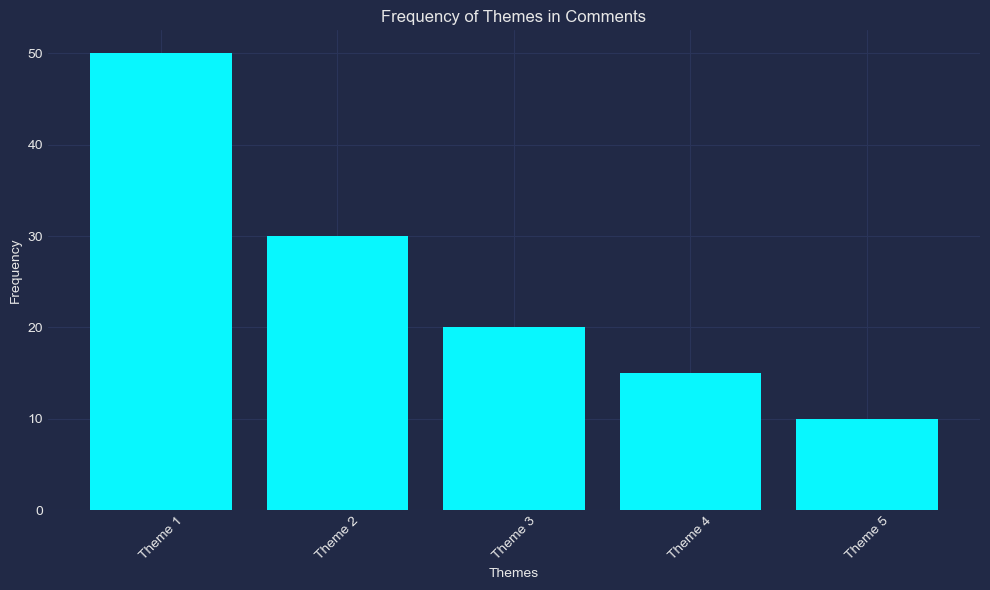

In [16]:

themes = {'Theme 1': 50, 'Theme 2': 30, 'Theme 3': 20, 'Theme 4': 15, 'Theme 5': 10}

plt.figure(figsize=(10, 6))
plt.bar(themes.keys(), themes.values())
plt.title('Frequency of Themes in Comments')
plt.xlabel('Themes')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [19]:
comments= pd.DataFrame(comments).to_csv("../cleaned/comments.csv")

**Reddit:**

* Many users express concerns about UpGrad Abroad's legitimacy and value for money, with some calling it a scam.
* Some users have reported negative experiences with UpGrad's sales team, claiming they over-promise and mislead potential students.
* Several users question the quality of the programs and universities offered by UpGrad Abroad.
* Some users have had positive experiences with UpGrad Abroad, reporting salary hikes and successful study abroad journeys.

**Quora:**

* Several users have reported positive experiences with UpGrad Abroad, highlighting the quality of the courses and the support they received.
* Some users have reported receiving significant salary increases after completing their UpGrad Abroad programs.
* Some users express concerns about the high cost of UpGrad Abroad programs and the lack of placement assistance.
* Some users question the legitimacy of UpGrad Abroad, but others attest to its trustworthiness.

**Trustpilot:**

* Users have mixed experiences with UpGrad, with some praising the quality of the courses and others criticizing the customer support and aggressive sales tactics.

**Glassdoor:**

* Employees generally have a positive view of working at UpGrad Abroad, with a 3.7 out of 5 rating.
* Employees appreciate the work environment and culture at UpGrad Abroad.
* Some employees have expressed concerns about the workload and lack of work-life balance.

**YouTube:**

* Several videos feature UpGrad Abroad learners sharing their positive experiences with the program.
* Learners highlight the quality of the courses, the support they received, and the opportunities they gained through UpGrad Abroad.

**Overall:**

UpGrad Abroad receives mixed reviews, with some users reporting positive experiences and others expressing concerns about the program's legitimacy, cost, and quality. It's important to conduct thorough research and read multiple reviews before making a decision about enrolling in an UpGrad Abroad program.